In [5]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker for generating realistic data
fake = Faker()

# Number of samples
num_samples = 1000

# Generating dummy data
data = {
    'Transaction ID': [fake.uuid4() for _ in range(num_samples)],
    'Transaction Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Transaction Amount': np.random.uniform(1, 1000, num_samples).round(2),
    'Transaction Type': np.random.choice(['Withdrawal', 'Deposit', 'Transfer'], num_samples),
    'Account Number': [fake.random_number(digits=10) for _ in range(num_samples)],
    'Account Balance': np.random.uniform(0, 50000, num_samples).round(2),
    'Transaction Location': np.random.choice(['Online', 'ATM', 'Branch'], num_samples),
    'Device Used': np.random.choice(['Mobile', 'Desktop', 'ATM'], num_samples),
    'IP Address': [fake.ipv4() for _ in range(num_samples)],
    'Merchant Name': [fake.company() for _ in range(num_samples)],
    'Merchant Category Code': np.random.choice(['Retail', 'Entertainment', 'Food', 'Travel'], num_samples),
    'Account Tenure': np.random.randint(1, 20, num_samples),  # in years
    'Transaction Frequency': np.random.randint(1, 30, num_samples),  # number of transactions per month
    'Previous Fraud History': np.random.choice([0, 1], num_samples),  # 0 = No, 1 = Yes
    'Customer Age': np.random.randint(18, 75, num_samples),
    'Customer Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Customer Income': np.random.uniform(20000, 150000, num_samples).round(2),
    'Customer Occupation': np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Artist', 'Others'], num_samples),
    'Customer Location': np.random.choice(['Urban', 'Rural'], num_samples)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
print(df.head())

# Optionally, save the DataFrame to a CSV file
df.to_csv('bank_transactions.csv', index=False)


                         Transaction ID    Transaction Date  \
0  16cba128-e586-499f-896a-284d636de996 2024-07-16 00:32:46   
1  51d4509e-e994-4b00-9fc0-a62354136408 2024-03-06 09:22:29   
2  7a6adce4-e474-4216-8233-6a6745cde2ed 2024-01-31 15:06:35   
3  3a266565-7135-439d-a807-7b21c73cbef1 2024-01-16 02:09:24   
4  041bb071-4725-4eb1-acbb-17a7e8214587 2024-08-25 09:28:04   

   Transaction Amount Transaction Type  Account Number  Account Balance  \
0              427.12       Withdrawal      8411836588         28240.08   
1               13.45         Transfer      5275066551         17781.85   
2               52.79          Deposit      9799489441         41698.21   
3              599.57       Withdrawal      6121518686            26.42   
4              358.90          Deposit       199955854         48341.49   

  Transaction Location Device Used       IP Address  \
0               Online         ATM   81.251.234.150   
1               Online      Mobile    54.174.17.187   
2    

In [4]:
#!pip install faker

In [9]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Faker for generating realistic data
fake = Faker()

# Number of samples
num_samples = 1000

# Generating dummy data
data = {
    'Transaction ID': [fake.uuid4() for _ in range(num_samples)],
    'Transaction Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Transaction Amount': np.random.uniform(1, 1000, num_samples).round(2),
    'Transaction Type': np.random.choice(['Withdrawal', 'Deposit', 'Transfer'], num_samples),
    'Account Number': [fake.random_number(digits=10) for _ in range(num_samples)],
    'Account Balance': np.random.uniform(0, 50000, num_samples).round(2),
    'Transaction Location': np.random.choice(['Online', 'ATM', 'Branch'], num_samples),
    'Device Used': np.random.choice(['Mobile', 'Desktop', 'ATM'], num_samples),
    'IP Address': [fake.ipv4() for _ in range(num_samples)],
    'Merchant Name': [fake.company() for _ in range(num_samples)],
    'Merchant Category Code': np.random.choice(['Retail', 'Entertainment', 'Food', 'Travel'], num_samples),
    'Account Tenure': np.random.randint(1, 20, num_samples),  # in years
    'Transaction Frequency': np.random.randint(1, 30, num_samples),  # number of transactions per month
    'Previous Fraud History': np.random.choice([0, 1], num_samples),  # 0 = No, 1 = Yes
    'Customer Age': np.random.randint(18, 75, num_samples),
    'Customer Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Customer Income': np.random.uniform(20000, 150000, num_samples).round(2),
    'Customer Occupation': np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Artist', 'Others'], num_samples),
    'Customer Location': np.random.choice(['Urban', 'Rural'], num_samples),
    'Fraudulent': np.random.choice([0, 1], num_samples)  # Target variable: 0 = No Fraud, 1 = Fraud
}

# Create a DataFrame
df = pd.DataFrame(data)

# Preprocessing
# Drop non-numeric columns or encode them appropriately
df = df.drop(['Transaction ID', 'IP Address', 'Account Number', 'Merchant Name'], axis=1)

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Transaction Type', 'Transaction Location', 'Device Used', 'Merchant Category Code', 'Customer Gender', 'Customer Occupation', 'Customer Location']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert date columns to datetime and extract features (e.g., day of the week, month)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Day of Week'] = df['Transaction Date'].dt.dayofweek
df['Month'] = df['Transaction Date'].dt.month
df.drop('Transaction Date', axis=1, inplace=True)

# Define features and target
X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = imPipeline(steps=[
    ('classifier', model)
])

# Train the model
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = pipeline.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[73 80]
 [85 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.48      0.47       153
           1       0.44      0.42      0.43       147

    accuracy                           0.45       300
   macro avg       0.45      0.45      0.45       300
weighted avg       0.45      0.45      0.45       300



In [ ]:
#!pip install imblearn

In [10]:
#insurance claim
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Faker for generating realistic data
fake = Faker()

# Number of samples
num_samples = 1000

# Generating dummy data
data = {
    'Customer ID': [fake.uuid4() for _ in range(num_samples)],
    'Policy Start Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Policy End Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Policy Submit Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Policy Quote Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Policy Bound Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Policy Booked Date': [fake.date_time_this_year() for _ in range(num_samples)],
    'Underwriter Tenure': np.random.randint(1, 10, num_samples),
    'Customer Tenure': np.random.randint(1, 20, num_samples),
    'Type of Business': np.random.choice(['Property', 'Casualty', 'Environment', 'Entertainment', 'Accidental', 'Health', 'Farming', 'Technical Line', 'Automobile', 'Energy', 'Cyber Security', 'Marine'], num_samples),
    'Demographic': np.random.choice(['Urban', 'Rural'], num_samples),
    'Location': np.random.choice(['City', 'Suburban', 'Rural'], num_samples),
    'Conversion Rate': np.random.uniform(0.1, 0.9, num_samples),
    'Local Currency': np.random.uniform(1000, 50000, num_samples).round(2),
    'Booked Amount': np.random.uniform(1000, 50000, num_samples).round(2),
    'Bound Amount in $': np.random.uniform(1000, 50000, num_samples).round(2),
    'Any Claim': np.random.choice([0, 1], num_samples),  # 0 = No Claim, 1 = Claim
    'Policy Info Received': np.random.choice(['Text', 'Call', 'Message'], num_samples),
    'New': np.random.choice([0, 1], num_samples),  # 0 = No, 1 = Yes
    'Renew': np.random.choice([0, 1], num_samples),
    'Endorsement': np.random.choice([0, 1], num_samples),
    'Any Existing Policy': np.random.choice([0, 1], num_samples),
    'Type of Job': np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Artist', 'Others'], num_samples),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], num_samples),
    'Male': np.random.choice([0, 1], num_samples),
    'Kids': np.random.choice([0, 1], num_samples),
    'Dependency': np.random.choice([0, 1], num_samples),
    'Any Health Insurance': np.random.choice([0, 1], num_samples),
    'Single Line': np.random.choice([0, 1], num_samples),
    'Multiple Line': np.random.choice([0, 1], num_samples),
    'Fraudulent': np.random.choice([0, 1], num_samples)  # Target variable: 0 = No Fraud, 1 = Fraud
}

# Create a DataFrame
df = pd.DataFrame(data)

# Preprocessing
# Drop non-numeric columns or encode them appropriately
df = df.drop(['Customer ID'], axis=1)

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Type of Business', 'Demographic', 'Location', 'Policy Info Received', 'Type of Job', 'Education']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert date columns to datetime and extract features (e.g., day of the week, month)
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])
df['Policy Submit Date'] = pd.to_datetime(df['Policy Submit Date'])
df['Policy Quote Date'] = pd.to_datetime(df['Policy Quote Date'])
df['Policy Bound Date'] = pd.to_datetime(df['Policy Bound Date'])
df['Policy Booked Date'] = pd.to_datetime(df['Policy Booked Date'])

# Calculate features from date columns
df['Policy Duration'] = (df['Policy End Date'] - df['Policy Start Date']).dt.days
df['Days Since Submit'] = (df['Policy Bound Date'] - df['Policy Submit Date']).dt.days
df['Days Since Quote'] = (df['Policy Bound Date'] - df['Policy Quote Date']).dt.days

# Drop original date columns
df = df.drop(['Policy Start Date', 'Policy End Date', 'Policy Submit Date', 'Policy Quote Date', 'Policy Bound Date', 'Policy Booked Date'], axis=1)

# Define features and target
X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = imPipeline(steps=[
    ('classifier', model)
])

# Train the model
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = pipeline.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[86 63]
 [85 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54       149
           1       0.51      0.44      0.47       151

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.51      0.51      0.50       300



   Claim ID  Policy Number Claim Date Incident Date  Claim Amount Claim Type  \
0         1         221958 2023-01-01    2023-01-01  35033.272639   Accident   
1         2         771155 2023-01-02    2023-01-02  39925.352896   Accident   
2         3         231932 2023-01-03    2023-01-03  23237.666993      Theft   
3         4         465838 2023-01-04    2023-01-04  42183.525043   Accident   
4         5         359178 2023-01-05    2023-01-05  38561.428195     Damage   

  Vehicle Make Vehicle Model  Vehicle Year  Vehicle Value  ... Claimant Age  \
0          BMW       Model B          2015   37707.747397  ...           55   
1       Toyota       Model A          2020   40314.635682  ...           23   
2          BMW       Model A          2002   49748.687040  ...           52   
3         Ford       Model C          2021   32246.656274  ...           59   
4        Honda       Model B          2005   18854.887191  ...           18   

  Claimant Gender Claimant Occupation  Claim

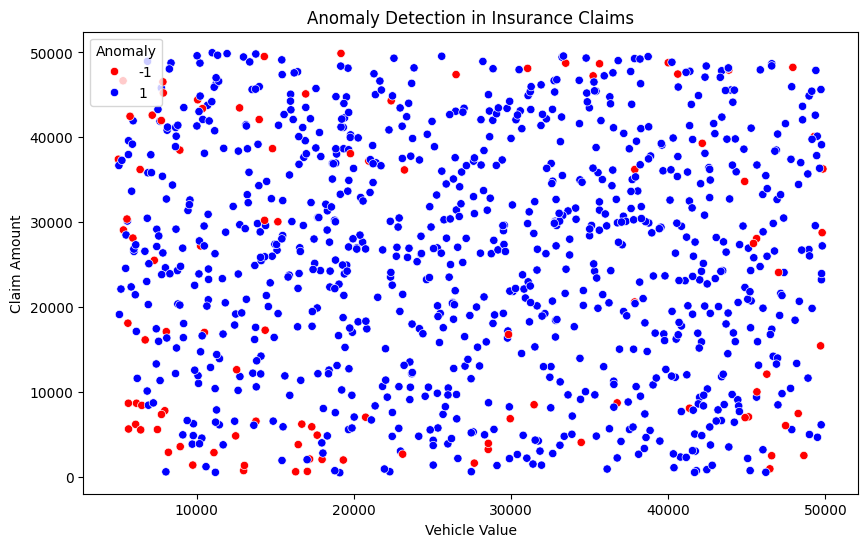

In [12]:
#Insurance claim for vehicals
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Dummy Data
np.random.seed(42)

# Define the number of samples
n_samples = 1000

# Create a synthetic dataset
data = {
    'Claim ID': range(1, n_samples + 1),
    'Policy Number': np.random.randint(100000, 999999, size=n_samples),
    'Claim Date': pd.date_range(start='2023-01-01', periods=n_samples, freq='D'),
    'Incident Date': pd.date_range(start='2023-01-01', periods=n_samples, freq='D'),
    'Claim Amount': np.random.uniform(500, 50000, size=n_samples),
    'Claim Type': np.random.choice(['Accident', 'Theft', 'Damage'], size=n_samples),
    'Vehicle Make': np.random.choice(['Toyota', 'Ford', 'BMW', 'Honda'], size=n_samples),
    'Vehicle Model': np.random.choice(['Model A', 'Model B', 'Model C'], size=n_samples),
    'Vehicle Year': np.random.randint(2000, 2023, size=n_samples),
    'Vehicle Value': np.random.uniform(5000, 50000, size=n_samples),
    'Policy Start Date': pd.date_range(start='2022-01-01', periods=n_samples, freq='D'),
    'Policy End Date': pd.date_range(start='2023-01-01', periods=n_samples, freq='D'),
    'Policy Coverage': np.random.choice(['Comprehensive', 'Third-Party'], size=n_samples),
    'Policy Premium': np.random.uniform(200, 2000, size=n_samples),
    'Claimant Age': np.random.randint(18, 70, size=n_samples),
    'Claimant Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Claimant Occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist', 'Other'], size=n_samples),
    'Claimant Location': np.random.choice(['City A', 'City B', 'City C'], size=n_samples),
    'Incident Location': np.random.choice(['Location A', 'Location B', 'Location C'], size=n_samples),
    'Previous Claims': np.random.randint(0, 5, size=n_samples),
    'Repair History': np.random.choice([0, 1], size=n_samples),
    'Mileage': np.random.uniform(5000, 150000, size=n_samples),
    'Service Records': np.random.choice([0, 1], size=n_samples),
    'Fraudulent': np.random.choice([0, 1], size=n_samples)  # Target variable
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Step 2: Preprocess the Data

# Define features and target
features = df.drop(['Claim ID', 'Fraudulent'], axis=1)
target = df['Fraudulent']

# Preprocessing for numerical data
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with the median
    ('scaler', StandardScaler())])  # Standardize numerical features

# Preprocessing for categorical data
categorical_features = features.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(features)

# Step 3: Train a Fraud Detection Model

# Use Isolation Forest for anomaly detection (fraud detection)
model = IsolationForest(contamination=0.1, random_state=42)  # Set contamination to the expected fraction of outliers
model.fit(X)

# Predict anomalies
df['Anomaly'] = model.predict(X)  # -1 for outliers (potential fraud), 1 for inliers

# Display the first few rows of the dataframe with anomaly predictions
print(df[['Claim ID', 'Anomaly', 'Fraudulent']].head())

# Step 4: Analyze and Visualize Anomalies

# Visualization to check the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vehicle Value', y='Claim Amount', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Insurance Claims')
plt.xlabel('Vehicle Value')
plt.ylabel('Claim Amount')
plt.legend(title='Anomaly')
plt.show()


   Customer ID  Age  Gender  Income Education Level Occupation  \
0            1   56    Male   65648          Master   Engineer   
1            2   69    Male   29516          Master      Other   
2            3   46    Male   22396          Master   Engineer   
3            4   32  Female  104082          Master   Engineer   
4            5   60    Male   39129             PhD   Engineer   

   Account Balance  Account Tenure  Number of Accounts  Transaction Frequency  \
0            16438              14                   2                     43   
1            49442               6                   2                     17   
2            38525              10                   4                     23   
3             3994               9                   4                      7   
4            48994              10                   4                     44   

   Monthly Spending  Credit Score   Loan Amount  Loan Tenure  Service Rating  \
0        606.909644           811  1

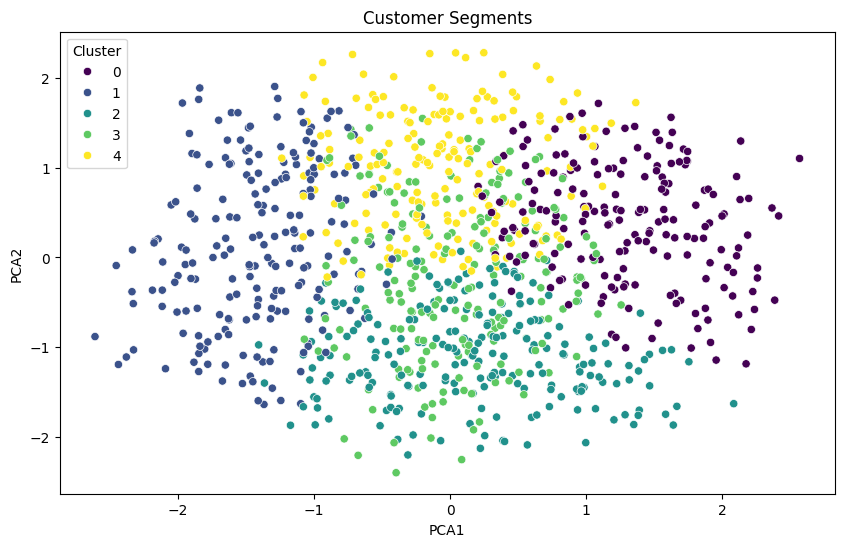

In [11]:
#customer segmentation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Dummy Data
np.random.seed(42)  # For reproducibility

# Define the number of samples
n_samples = 1000

# Create a synthetic dataset
data = {
    'Customer ID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 70, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Income': np.random.randint(20000, 120000, size=n_samples),
    'Education Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=n_samples),
    'Occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist', 'Other'], size=n_samples),
    'Account Balance': np.random.randint(1000, 50000, size=n_samples),
    'Account Tenure': np.random.randint(1, 15, size=n_samples),
    'Number of Accounts': np.random.randint(1, 5, size=n_samples),
    'Transaction Frequency': np.random.randint(1, 50, size=n_samples),
    'Monthly Spending': np.random.uniform(100, 2000, size=n_samples),
    'Credit Score': np.random.randint(300, 850, size=n_samples),
    'Loan Amount': np.random.uniform(5000, 50000, size=n_samples),
    'Loan Tenure': np.random.randint(1, 10, size=n_samples),
    'Service Rating': np.random.uniform(1, 5, size=n_samples),
    'Complaint History': np.random.randint(0, 5, size=n_samples),
    'Feedback Sentiment': np.random.choice(['Positive', 'Neutral', 'Negative'], size=n_samples),
    'Internet Banking Usage': np.random.randint(0, 100, size=n_samples),
    'Mobile Banking Usage': np.random.randint(0, 100, size=n_samples),
    'Fraud Alerts': np.random.choice([0, 1], size=n_samples),
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Step 2: Preprocess the Data

# Define features and target (if any)
features = df.drop('Customer ID', axis=1)

# Preprocessing for numerical data
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with the median
    ('scaler', StandardScaler())])  # Standardize numerical features

# Preprocessing for categorical data
categorical_features = features.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(features)

# Step 3: Perform Clustering

# Define the number of clusters
n_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Analyze and Visualize Clusters

# Reduce dimensions for visualization (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [13]:
#Creating a real-time transaction fraud detection

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate Dummy Data
np.random.seed(42)

# Define the number of samples
n_samples = 10000

# Create a synthetic dataset
data = {
    'Transaction ID': range(1, n_samples + 1),
    'Amount': np.random.uniform(1, 1000, size=n_samples),
    'Transaction Type': np.random.choice(['Purchase', 'Refund', 'Transfer', 'Withdrawal'], size=n_samples),
    'Location': np.random.choice(['City A', 'City B', 'City C'], size=n_samples),
    'Time of Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], size=n_samples),
    'Customer ID': np.random.randint(1, 5000, size=n_samples),
    'Account Age': np.random.randint(1, 15, size=n_samples),  # in years
    'Number of Transactions': np.random.randint(1, 100, size=n_samples),
    'Previous Fraudulent Transactions': np.random.randint(0, 5, size=n_samples),
    'Amount Spent This Month': np.random.uniform(0, 5000, size=n_samples),
    'Fraudulent': np.random.choice([0, 1], size=n_samples)  # Target variable
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Step 2: Preprocess the Data

# Define features and target
features = df.drop(['Transaction ID', 'Fraudulent'], axis=1)
target = df['Fraudulent']

# Preprocessing for numerical data
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with the median
    ('scaler', StandardScaler())])  # Standardize numerical features

# Preprocessing for categorical data
categorical_features = features.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(features)

# Step 3: Train a Fraud Detection Model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Real-Time Fraud Detection

# Example function to predict fraud in real-time transactions
def predict_fraud(transaction_data):
    # Convert transaction_data to DataFrame
    transaction_df = pd.DataFrame(transaction_data)
    
    # Preprocess the data
    X_new = preprocessor.transform(transaction_df)
    
    # Predict fraud
    predictions = model.predict(X_new)
    
    return predictions

# Example new transaction data
new_transactions = [
    {'Amount': 250, 'Transaction Type': 'Purchase', 'Location': 'City A', 'Time of Day': 'Afternoon', 'Customer ID': 123, 'Account Age': 5, 'Number of Transactions': 20, 'Previous Fraudulent Transactions': 0, 'Amount Spent This Month': 300},
    {'Amount': 10000, 'Transaction Type': 'Withdrawal', 'Location': 'City B', 'Time of Day': 'Night', 'Customer ID': 456, 'Account Age': 10, 'Number of Transactions': 50, 'Previous Fraudulent Transactions': 2, 'Amount Spent This Month': 7000}
]

# Predict fraud
predictions = predict_fraud(new_transactions)
print("\nFraud Predictions:")
print(predictions)


   Transaction ID      Amount Transaction Type Location Time of Day  \
0               1  375.165579         Transfer   City B     Evening   
1               2  950.763592       Withdrawal   City A       Night   
2               3  732.261948       Withdrawal   City A   Afternoon   
3               4  599.059826           Refund   City B     Evening   
4               5  156.862622         Purchase   City C     Morning   

   Customer ID  Account Age  Number of Transactions  \
0         3631           13                       4   
1         4943            2                      96   
2          163            1                      22   
3          116            1                      35   
4         1471            8                      14   

   Previous Fraudulent Transactions  Amount Spent This Month  Fraudulent  
0                                 3              2381.622059           0  
1                                 0              4173.984297           0  
2                

In [ ]:
To build a real-time fraud detection system using Apache Spark and Apache Kafka, you will follow a process that involves setting up Kafka for streaming data, processing the data in real-time with Spark Streaming, and deploying a fraud detection model. Below is a step-by-step guide with example code.

Prerequisites
Apache Kafka: For handling real-time data streaming.
Apache Spark: For real-time data processing and machine learning.
Python: For the example code, but you can also use Scala or Java with Spark.
Step 1: Set Up Kafka
Install Kafka: Follow the Kafka documentation to download and set up Kafka.

Start Kafka: Start the Kafka server and create a topic for streaming data.

sh
Copy code
# Start ZooKeeper
bin/zookeeper-server-start.sh config/zookeeper.properties

# Start Kafka server
bin/kafka-server-start.sh config/server.properties

# Create a topic
bin/kafka-topics.sh --create --topic transactions --bootstrap-server localhost:9092 --partitions 1 --replication-factor 1
Step 2: Generate Dummy Data and Send to Kafka
You will write a producer script that sends synthetic transaction data to the Kafka topic.

python
Copy code
from kafka import KafkaProducer
import json
import numpy as np
import pandas as pd
from datetime import datetime

def generate_transaction():
    return {
        'Transaction ID': np.random.randint(1, 100000),
        'Amount': np.random.uniform(1, 1000),
        'Transaction Type': np.random.choice(['Purchase', 'Refund', 'Transfer', 'Withdrawal']),
        'Location': np.random.choice(['City A', 'City B', 'City C']),
        'Time of Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night']),
        'Customer ID': np.random.randint(1, 5000),
        'Account Age': np.random.randint(1, 15),
        'Number of Transactions': np.random.randint(1, 100),
        'Previous Fraudulent Transactions': np.random.randint(0, 5),
        'Amount Spent This Month': np.random.uniform(0, 5000),
        'Timestamp': datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    }

# Create Kafka producer
producer = KafkaProducer(bootstrap_servers='localhost:9092', value_serializer=lambda v: json.dumps(v).encode('utf-8'))

# Send dummy data
for _ in range(100):
    transaction = generate_transaction()
    producer.send('transactions', transaction)
    print(f"Sent transaction: {transaction}")

producer.flush()
Step 3: Set Up Spark Streaming
You will use Spark Streaming to consume data from Kafka and process it.

Install Spark: Follow the Spark documentation to set up Spark.

Spark Streaming Script: This script will consume data from Kafka, process it, and make predictions.

python
Copy code
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FraudDetection") \
    .getOrCreate()

# Define schema for incoming data
schema = StructType([
    StructField("Transaction ID", IntegerType(), True),
    StructField("Amount", FloatType(), True),
    StructField("Transaction Type", StringType(), True),
    StructField("Location", StringType(), True),
    StructField("Time of Day", StringType(), True),
    StructField("Customer ID", IntegerType(), True),
    StructField("Account Age", IntegerType(), True),
    StructField("Number of Transactions", IntegerType(), True),
    StructField("Previous Fraudulent Transactions", IntegerType(), True),
    StructField("Amount Spent This Month", FloatType(), True),
    StructField("Timestamp", StringType(), True)
])

# Read data from Kafka
df_stream = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "transactions") \
    .load() \
    .selectExpr("CAST(value AS STRING)") \
    .select(from_json("value", schema).alias("data")) \
    .select("data.*")

# Preprocess the data
assembler = VectorAssembler(
    inputCols=['Amount', 'Account Age', 'Number of Transactions', 'Previous Fraudulent Transactions', 'Amount Spent This Month'],
    outputCol='features'
)

# Define a dummy model for example purposes
rf_model = RandomForestClassifier(labelCol="Fraudulent", featuresCol="features")

pipeline = Pipeline(stages=[assembler, rf_model])

# Train model on historical data (dummy example)
# Load historical data
df_historical = spark.read.csv("path_to_historical_data.csv", header=True, inferSchema=True)
df_historical = df_historical.withColumn("Fraudulent", col("Fraudulent").cast(IntegerType()))

# Train the model
model = pipeline.fit(df_historical)

# Predict fraud
predictions = model.transform(df_stream)

# Output results to console
query = predictions.writeStream \
    .outputMode("append") \
    .format("console") \
    .start()

query.awaitTermination()
Explanation
Kafka Setup:

Starts Kafka and creates a topic named transactions.
Data Generation and Sending:

The producer script generates dummy transaction data and sends it to the Kafka topic.
Spark Streaming:

Consumes the data from Kafka in real-time using Spark Streaming.
Applies preprocessing steps and uses a model to predict fraud. For simplicity, a dummy model is used. In practice, you would train the model on historical data.
Notes
Historical Data: You need to train your fraud detection model on historical data to make accurate predictions. The example uses a placeholder for this.
Model Deployment: In a production setting, the model would be trained offline, and the pipeline would be used to make real-time predictions.
Scalability: Ensure that your Spark and Kafka setup can handle the scale of data and processing required.
This setup provides a basic framework for real-time fraud detection. For a production system, you would need to address additional aspects such as model monitoring, error handling, and integration with your existing systems.

In [16]:
#Bank Churn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate Dummy Data
np.random.seed(42)

# Define the number of samples
n_samples = 10000

# Create a synthetic dataset
data = {
    'Customer ID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 70, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Tenure': np.random.randint(1, 15, size=n_samples),
    'Account Type': np.random.choice(['Checking', 'Savings', 'Investment'], size=n_samples),
    'Balance': np.random.uniform(1000, 50000, size=n_samples),
    'Monthly Income': np.random.uniform(2000, 15000, size=n_samples),
    'Number of Transactions': np.random.randint(1, 200, size=n_samples),
    'Credit Score': np.random.randint(300, 850, size=n_samples),
    'Number of Products': np.random.randint(1, 5, size=n_samples),
    'Is Active Member': np.random.choice([0, 1], size=n_samples),
    'Last Transaction Amount': np.random.uniform(0, 2000, size=n_samples),
    'Online Banking Usage': np.random.choice([0, 1], size=n_samples),
    'Customer Support Calls': np.random.randint(0, 10, size=n_samples),
    'Contract Type': np.random.choice(['Monthly', 'Yearly'], size=n_samples),
    'Churn': np.random.choice([0, 1], size=n_samples)  # Target variable
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Step 2: Preprocess the Data

# Define features and target
features = df.drop(['Customer ID', 'Churn'], axis=1)
target = df['Churn']

# Preprocessing for numerical data
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numerical features

# Preprocessing for categorical data
categorical_features = features.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(features)

# Step 3: Train a Churn Prediction Model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Real-Time Churn Prediction

# Example function to predict churn in real-time
def predict_churn(customer_data):
    # Convert customer_data to DataFrame
    customer_df = pd.DataFrame(customer_data)
    
    # Preprocess the data
    X_new = preprocessor.transform(customer_df)
    
    # Predict churn
    predictions = model.predict(X_new)
    
    return predictions

# Example new customer data
new_customers = [
    {'Age': 30, 'Gender': 'Male', 'Tenure': 5, 'Account Type': 'Checking', 'Balance': 5000, 'Monthly Income': 4000, 'Number of Transactions': 50, 'Credit Score': 700, 'Number of Products': 2, 'Is Active Member': 1, 'Last Transaction Amount': 100, 'Online Banking Usage': 1, 'Customer Support Calls': 2, 'Contract Type': 'Monthly'},
    {'Age': 45, 'Gender': 'Female', 'Tenure': 10, 'Account Type': 'Savings', 'Balance': 10000, 'Monthly Income': 6000, 'Number of Transactions': 20, 'Credit Score': 750, 'Number of Products': 3, 'Is Active Member': 0, 'Last Transaction Amount': 200, 'Online Banking Usage': 0, 'Customer Support Calls': 5, 'Contract Type': 'Yearly'}
]

# Predict churn
predictions = predict_churn(new_customers)
print("\nChurn Predictions:")
print(predictions)


   Customer ID  Age  Gender  Tenure Account Type       Balance  \
0            1   56    Male       1      Savings  15024.931950   
1            2   69  Female      12   Investment  44810.778871   
2            3   46  Female       6      Savings   9883.331129   
3            4   32  Female       4     Checking  23477.933030   
4            5   60    Male       5     Checking  29814.338199   

   Monthly Income  Number of Transactions  Credit Score  Number of Products  \
0     5112.286467                     195           741                   2   
1     7575.863994                     167           665                   2   
2     3971.144882                      89           654                   3   
3     7584.716335                     194           654                   4   
4    11121.992768                      91           609                   3   

   Is Active Member  Last Transaction Amount  Online Banking Usage  \
0                 1               835.071990              

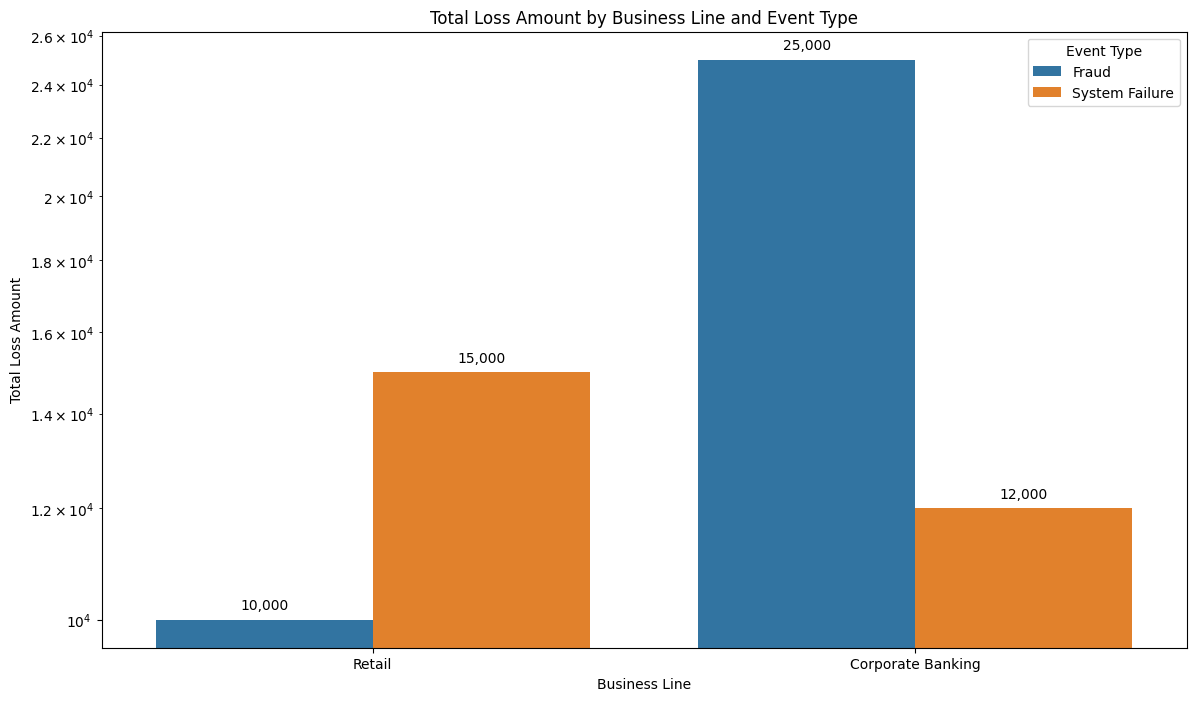

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data generation (if you need to test with dummy data)
grouped_data = pd.DataFrame({
    'Business Line': ['Retail', 'Corporate Banking', 'Retail', 'Corporate Banking'],
    'Event Type': ['Fraud', 'Fraud', 'System Failure', 'System Failure'],
    'Event Count': [100, 150, 200, 250],
    'Loss Amount': [10000, 25000, 15000, 12000]
})

# Assuming `grouped_data` is already created as per your code above

# Set up the bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=grouped_data, x='Business Line', y='Loss Amount', hue='Event Type')
plt.title('Total Loss Amount by Business Line and Event Type')
plt.ylabel('Total Loss Amount')
plt.yscale('log')

# Add labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',  # formatted as a comma-separated integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'bottom',  # horizontal and vertical alignment
                      xytext = (0, 5),  # offset label slightly above the bar
                      textcoords = 'offset points',
                      fontsize=10,
                      color='black')

plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_71504\660741827.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dummy_data.set_index('Date').resample('M')['Loss Amount'].mean().plot(color='purple', marker='o')
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_71504\660741827.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dummy_data.set_index('Date').resample('M')['Event Count'].sum().plot(color='teal', marker='o')


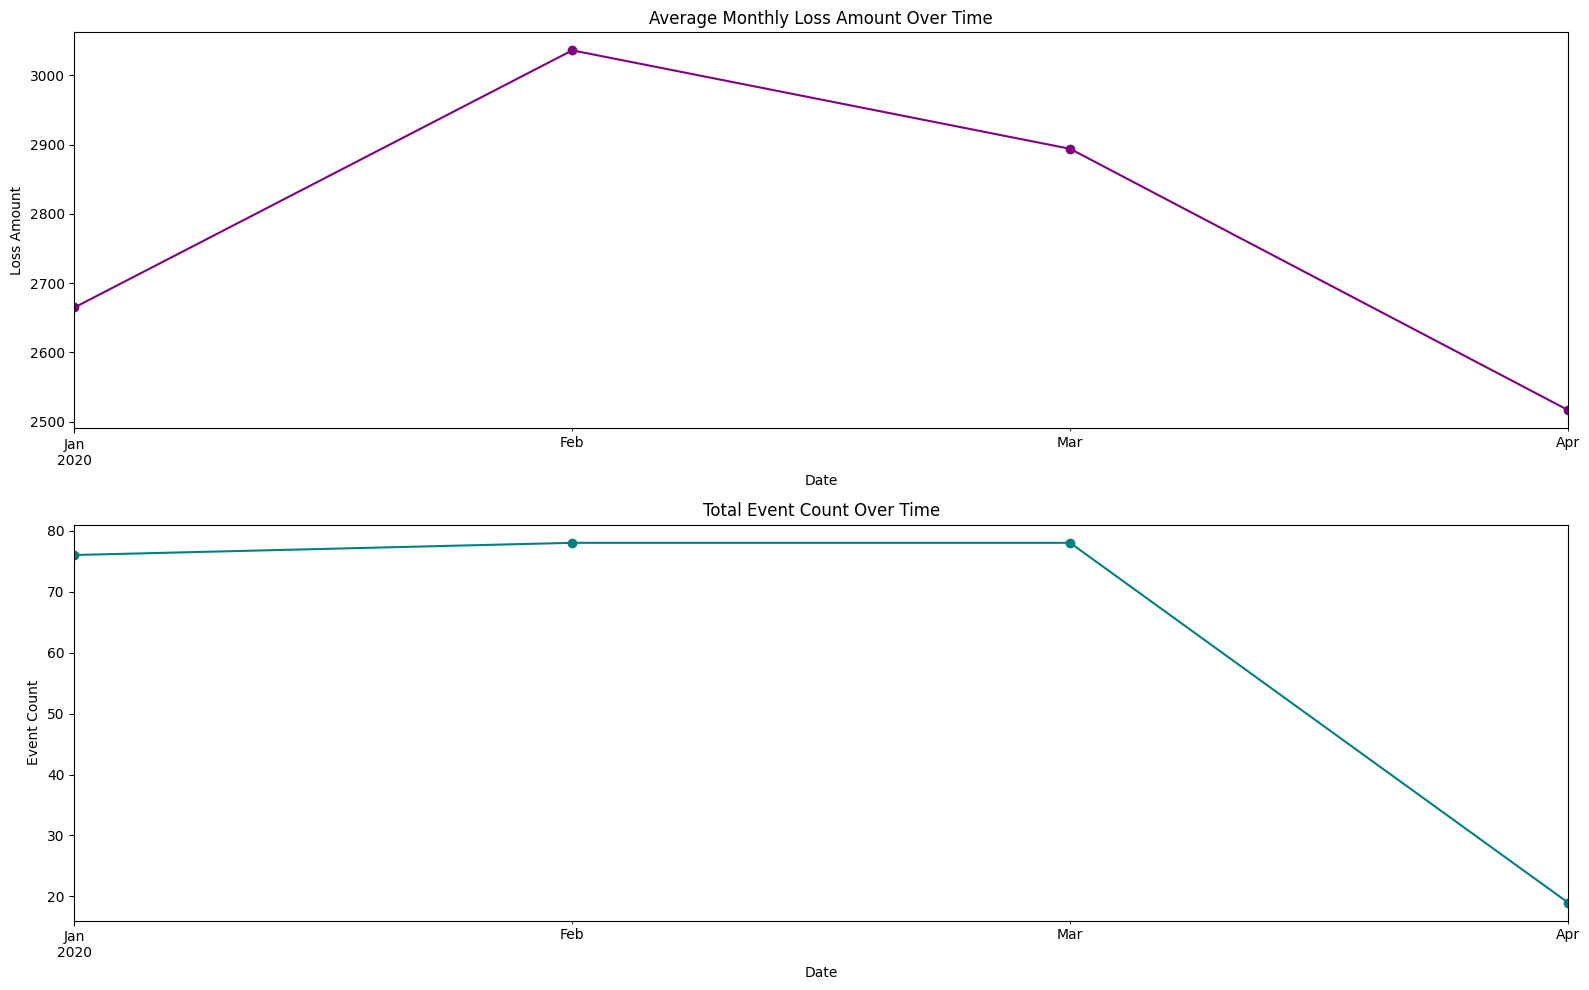

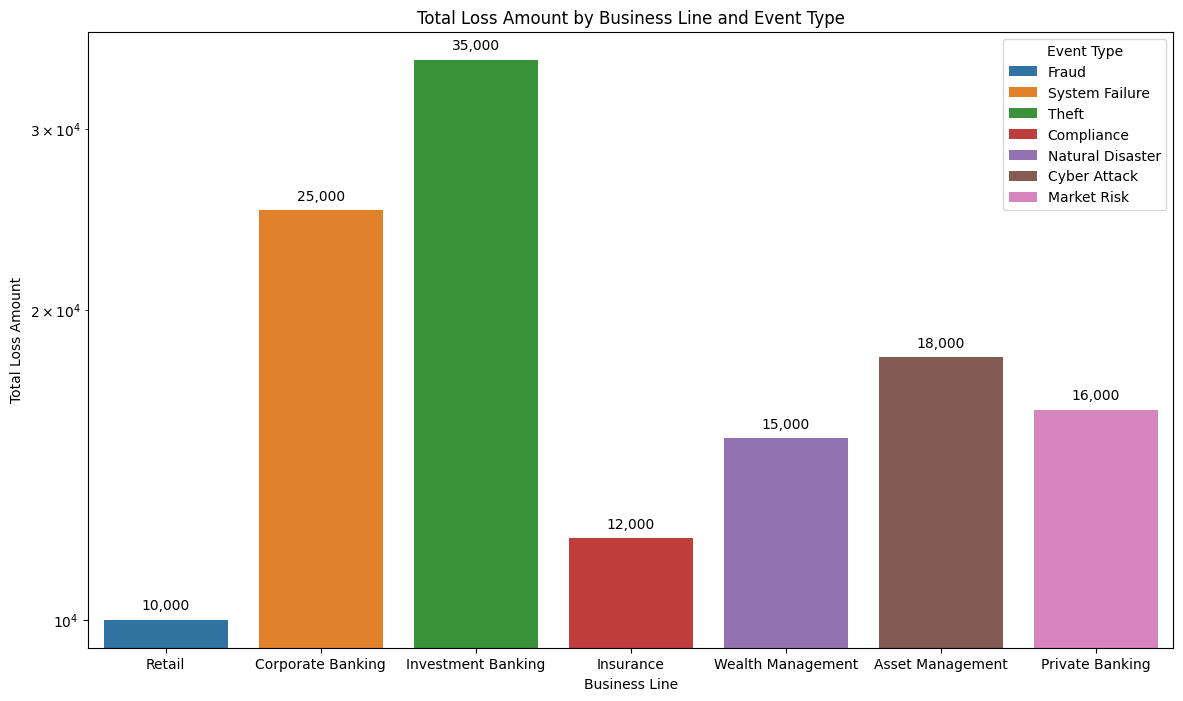

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dummy data setup (as a reference; replace with actual data)
dummy_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Loss Amount': np.random.uniform(1000, 5000, 100),
    'Event Count': np.random.randint(1, 5, 100)
})

grouped_summary = pd.DataFrame({
    'Business Line': ['Retail', 'Corporate Banking', 'Investment Banking', 'Insurance', 
                      'Wealth Management', 'Asset Management', 'Private Banking'],
    'Event Type': ['Fraud', 'System Failure', 'Theft', 'Compliance', 
                   'Natural Disaster', 'Cyber Attack', 'Market Risk'],
    'Loss Amount': [10000, 25000, 35000, 12000, 15000, 18000, 16000]
})

# Setting up plots for time-based analysis
plt.figure(figsize=(16, 10))

# Plotting average loss amount over time
plt.subplot(2, 1, 1)
dummy_data.set_index('Date').resample('M')['Loss Amount'].mean().plot(color='purple', marker='o')
plt.title('Average Monthly Loss Amount Over Time')
plt.ylabel('Loss Amount')

# Plotting event frequency over time
plt.subplot(2, 1, 2)
dummy_data.set_index('Date').resample('M')['Event Count'].sum().plot(color='teal', marker='o')
plt.title('Total Event Count Over Time')
plt.ylabel('Event Count')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

# Visualizing total loss amount by business line and event type
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=grouped_summary, x='Business Line', y='Loss Amount', hue='Event Type')
plt.title('Total Loss Amount by Business Line and Event Type')
plt.ylabel('Total Loss Amount')
plt.yscale('log')  # Log scale due to skewness

# Adding labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():,.0f}',  # format to comma-separated values with no decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),  # positioning the label at the bar's center
        ha='center', va='bottom',  # alignment for horizontal and vertical
        xytext=(0, 5),  # offset label slightly above the bar
        textcoords='offset points',
        fontsize=10,
        color='black'
    )

plt.show()


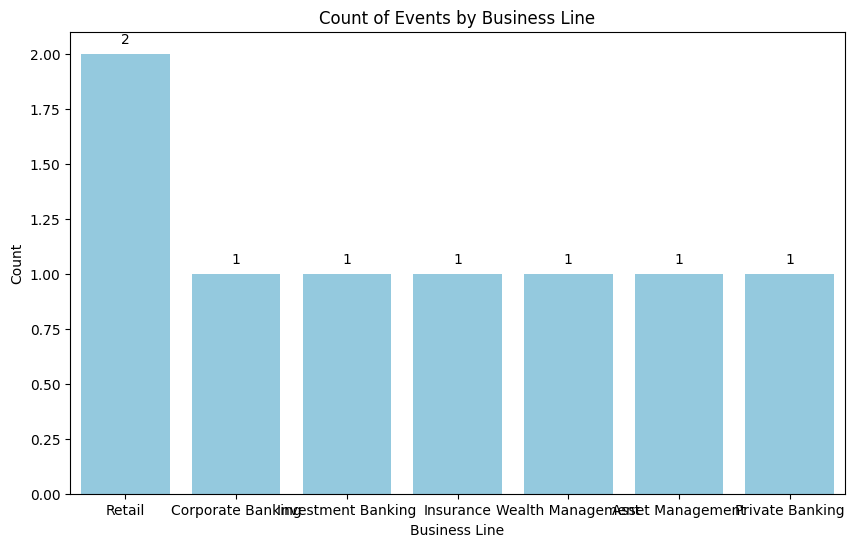

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dummy data setup (adjust or replace with actual data)
dummy_data = pd.DataFrame({
    'Business Line': ['Retail', 'Corporate Banking', 'Investment Banking', 'Insurance', 
                      'Wealth Management', 'Asset Management', 'Private Banking', 'Retail'],
    'Event Type': ['Fraud', 'System Failure', 'Theft', 'Compliance', 
                   'Natural Disaster', 'Cyber Attack', 'Market Risk', 'Fraud']
})

# Calculate the counts for each Business Line
business_line_counts = dummy_data['Business Line'].value_counts().reset_index()
business_line_counts.columns = ['Business Line', 'Count']

# Bar plot for Business Line counts
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=business_line_counts, x='Business Line', y='Count', color='skyblue')
plt.title('Count of Events by Business Line')
plt.ylabel('Count')

# Adding count labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_height())}',  # format count as an integer
        (p.get_x() + p.get_width() / 2., p.get_height()),  # positioning the label at the bar's center
        ha='center', va='bottom',  # alignment for horizontal and vertical
        xytext=(0, 5),  # offset label slightly above the bar
        textcoords='offset points',
        fontsize=10,
        color='black'
    )

plt.show()



C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_71504\2915598083.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', end='2024-01-01', freq='M')


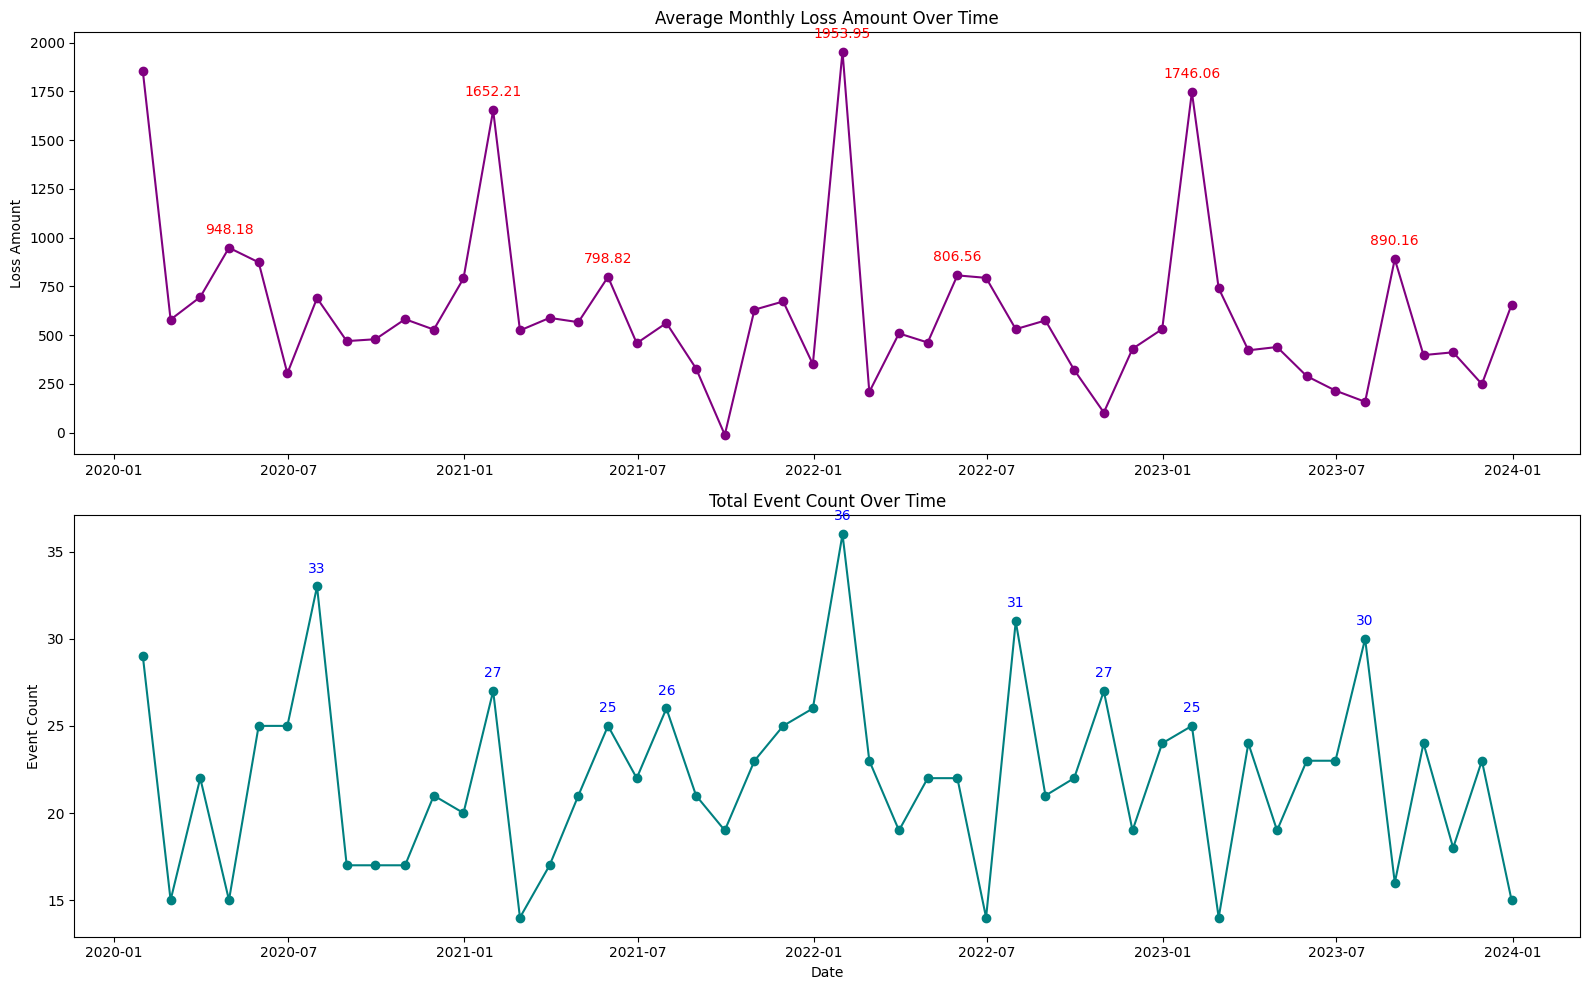

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data generation
dates = pd.date_range(start='2020-01-01', end='2024-01-01', freq='M')
np.random.seed(0)
loss_amounts = np.random.normal(loc=500, scale=200, size=len(dates))
loss_amounts[::12] += 1000  # Artificial spikes for illustration
event_counts = np.random.poisson(lam=20, size=len(dates))
event_counts[::6] += 10  # Artificial spikes for illustration

# Create a DataFrame
dummy_data = pd.DataFrame({'Date': dates, 'Loss Amount': loss_amounts, 'Event Count': event_counts})
dummy_data.set_index('Date', inplace=True)

# Set up plot
plt.figure(figsize=(16, 10))

# Plotting average monthly loss amount over time
plt.subplot(2, 1, 1)
plt.plot(dummy_data.index, dummy_data['Loss Amount'], color='purple', marker='o', label='Loss Amount')
plt.title('Average Monthly Loss Amount Over Time')
plt.ylabel('Loss Amount')

# Identify peaks for labeling
loss_peaks, _ = find_peaks(dummy_data['Loss Amount'], height=700)  # Adjust height threshold as needed

# Annotate spikes in Loss Amount
for peak in loss_peaks:
    plt.annotate(f'{dummy_data["Loss Amount"].iloc[peak]:.2f}',
                 (dummy_data.index[peak], dummy_data["Loss Amount"].iloc[peak]),
                 xytext=(0, 10), textcoords='offset points', ha='center', color='red')

# Plotting event frequency over time
plt.subplot(2, 1, 2)
plt.plot(dummy_data.index, dummy_data['Event Count'], color='teal', marker='o', label='Event Count')
plt.title('Total Event Count Over Time')
plt.ylabel('Event Count')
plt.xlabel('Date')

# Identify peaks for event counts
event_peaks, _ = find_peaks(dummy_data['Event Count'], height=25)  # Adjust height threshold as needed

# Annotate spikes in Event Count
for peak in event_peaks:
    plt.annotate(f'{dummy_data["Event Count"].iloc[peak]}',
                 (dummy_data.index[peak], dummy_data["Event Count"].iloc[peak]),
                 xytext=(0, 10), textcoords='offset points', ha='center', color='blue')

plt.tight_layout()
plt.show()
